In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/titanic.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning

In [3]:
# checikng missing values
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# percentage of missing values in dataset
df.isna().sum()/len(df)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [5]:
def drop_missing(data):
    for col in data.columns:
        if data[col].isnull().sum()/len(df)*100 >= 30:
            data = data.drop(col, axis = 1)
    data = data.dropna()
    return data

In [6]:
df = drop_missing(df)

In [7]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
# removing Ticket column for further process
df = df.drop('Ticket', axis = 1)

In [9]:
df.shape

(331, 9)

In [10]:
# removing duplicates 
df = df.drop_duplicates('Name')
df.shape

(331, 9)

## Exploratory analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Name         331 non-null    object 
 3   Sex          331 non-null    object 
 4   Age          331 non-null    float64
 5   SibSp        331 non-null    int64  
 6   Parch        331 non-null    int64  
 7   Fare         331 non-null    float64
 8   Embarked     331 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 25.9+ KB


In [12]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,2.141994,30.181269,0.483384,0.398792,40.982087
std,122.910180,0.846251,14.104573,0.875004,0.811582,61.228558
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.500000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1100.000000,2.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.500000,3.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,3.000000,76.000000,8.000000,6.000000,512.329200


In [13]:
numer_cols = ['PassengerId', 'Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']

#### Distribution of Numerical Columns

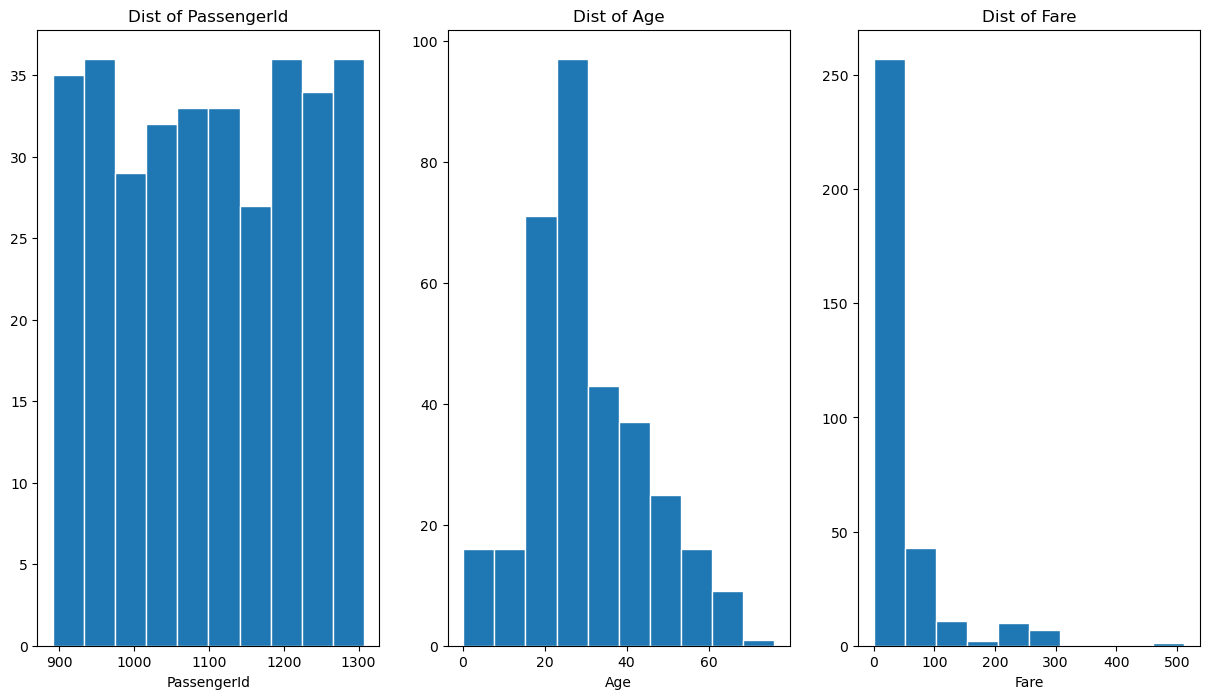

In [14]:
fig, ax = plt.subplots(1,len(numer_cols), figsize = (15,8))
for i, col in enumerate(numer_cols):
    df[col].hist(ax = ax[i], edgecolor = 'white', bins = 10, grid = False)
    ax[i].set_title(f'Dist of {col}')
    ax[i].set_xlabel(col)
plt.show()

#### Distribution of Categorical Columns

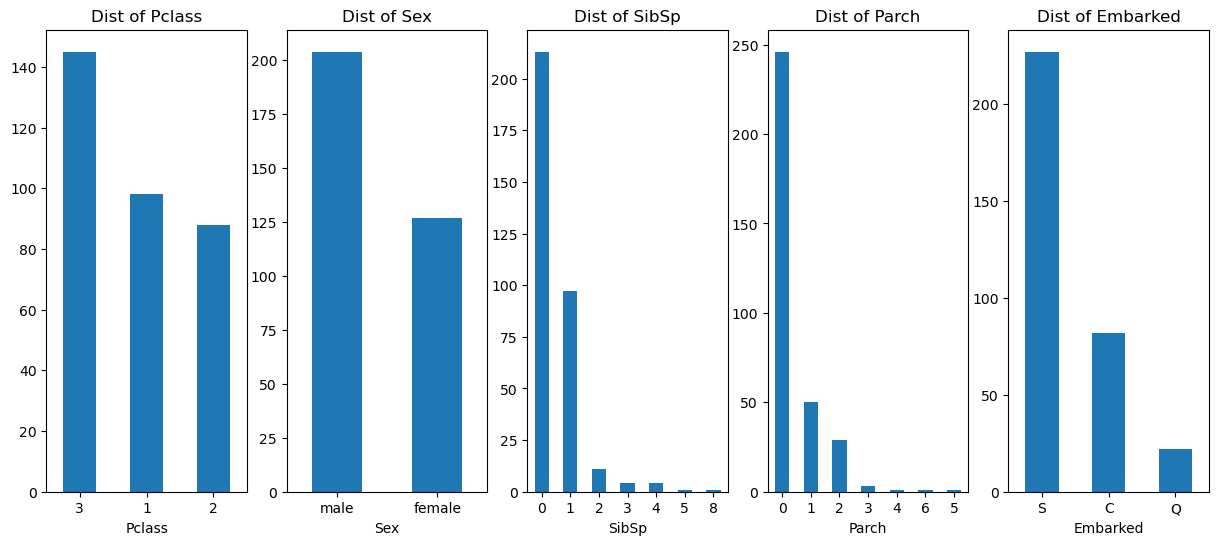

In [15]:
fig,ax = plt.subplots(1, len(cat_cols),figsize = (15,6))
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot.bar(ax = ax[i], rot = 0)
    ax[i].set_title(f'Dist of {col}')
    ax[i].set_xlabel(col)
plt.show()

In [16]:
cat_cols = [col for col in df.columns if col not in df.select_dtypes(include = np.number).columns]
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

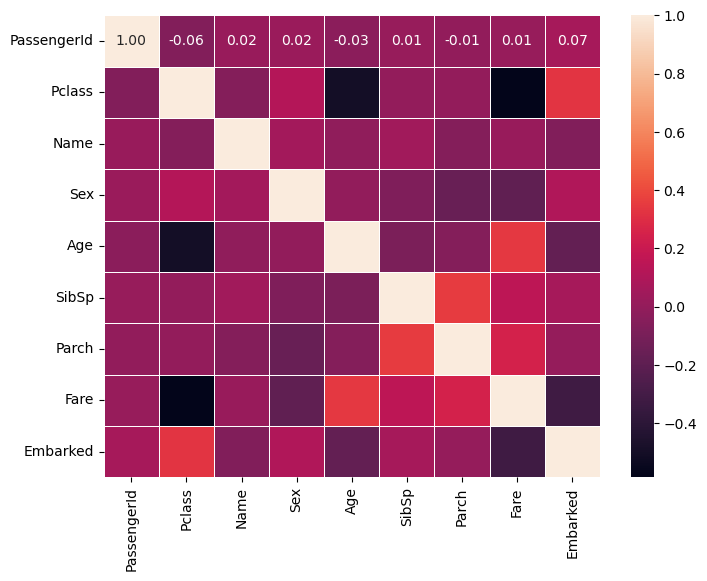

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidth = 0.5)
plt.show()

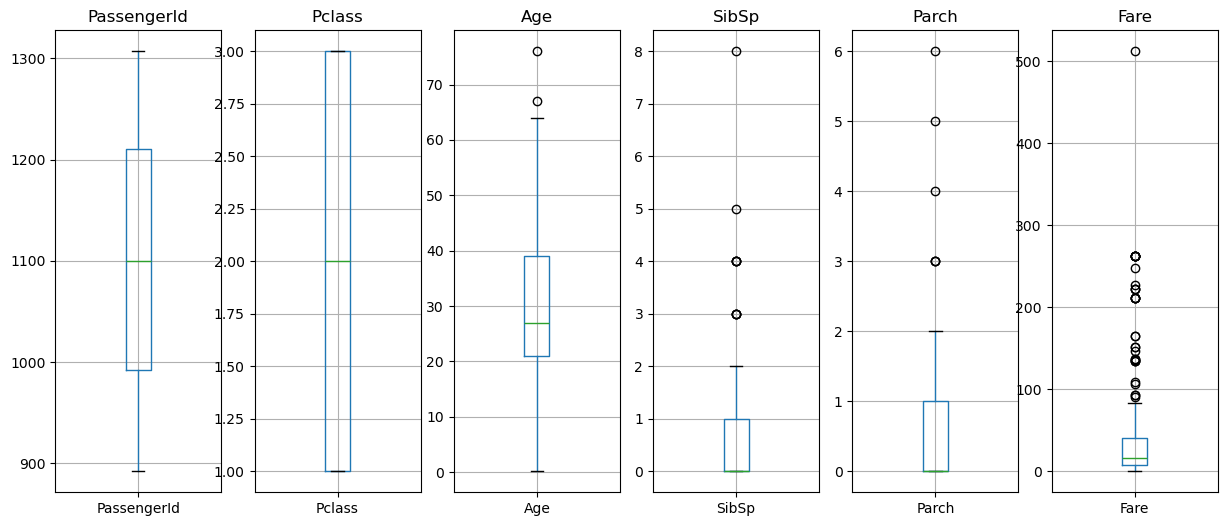

In [18]:
cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

def boxplot(df,cols):
    fig, ax = plt.subplots(1, len(cols), figsize = (15,6))
    for i, col in enumerate(cols):
        df.boxplot(column = col,ax = ax[i])
        ax[i].set_title(col)
boxplot(df,cols)

In [20]:
def remove_outliers(df,cols):
    new_df = df
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        new_df[col] = new_df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return new_df
new_data = remove_outliers(df,cols)

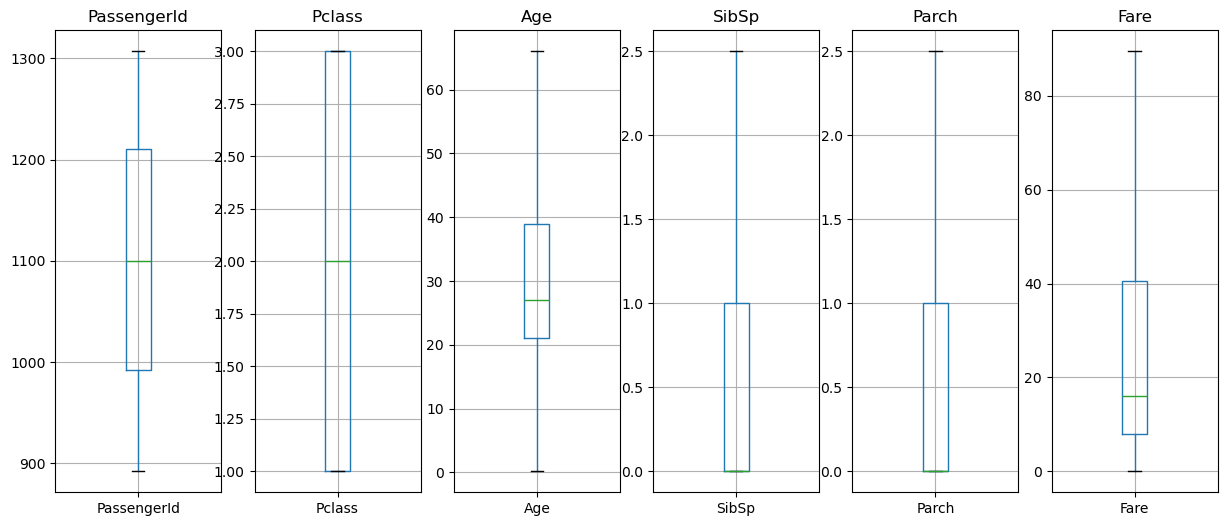

In [21]:
boxplot(new_data,cols)